In [1]:
import pandas as pd

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")
from numpy import log

In [3]:
A=pd.read_csv("training_set.csv")

In [4]:
A.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
def filler (f):
    import pandas as pd
    Q=pd.DataFrame(f.isna().sum(),columns=["Ct"])
    W=Q[Q.Ct>0].index
    for i in W:
        if f[i].dtypes=="object":
            X=f[i].mode()[0]
            f[i]=f[i].fillna(X)
        else:
            X=f[i].mean()
            f[i]=f[i].fillna(X)

In [6]:
filler(A)
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
# Define Y

In [8]:
Y = A[["Loan_Status"]]

In [9]:
# Drop Statistically unimportant

In [10]:
A.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N


In [11]:
# Exploratory Data Analysis

In [12]:
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [13]:
imp_cols = []

In [14]:
from PM8 import ANOVA
for i in con:
    q = ANOVA(A,"Loan_Status",i)
    print("-------------")
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)

-------------
Loan_Status vs ApplicantIncome
Pval:  0.903
-------------
Loan_Status vs CoapplicantIncome
Pval:  0.142
-------------
Loan_Status vs LoanAmount
Pval:  0.368
-------------
Loan_Status vs Loan_Amount_Term
Pval:  0.604
-------------
Loan_Status vs Credit_History
Pval:  0.0


In [15]:
for i in cat:
    imp_cols.append(i)

In [16]:
imp_cols

['CoapplicantIncome',
 'Credit_History',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [17]:
# Preprocessing

In [18]:
X.skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [19]:
from numpy import log

def skew_rem(df,col):
    q = []
    for i in df[col]:
        if(i != 0):
            q.append(log(i))
        else:
            q.append(i)
    df[col] = q

In [20]:
skew_rem(X,'ApplicantIncome')
skew_rem(X,'CoapplicantIncome')

In [21]:
X.skew()

ApplicantIncome      0.477562
CoapplicantIncome   -0.172920
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X1=pd.get_dummies(X[cat])
X=X2.join(X1)

In [23]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.515465,-1.107731,0.000000,0.279851,0.451640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.393196,0.782215,-0.219273,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.519896,-1.107731,-0.957641,0.279851,0.451640,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.751980,0.897656,-0.314547,0.279851,0.451640,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.554992,-1.107731,-0.064454,0.279851,0.451640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.572468,-1.107731,-0.898095,0.279851,0.451640,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,-0.033218,-1.107731,-1.267279,-2.518655,0.451640,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,1.015004,0.307594,1.269371,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0.918095,-1.107731,0.483367,0.279851,0.451640,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [24]:
# Dividing Data into training and testing set

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.2)

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(xtrain,ytrain)
pred_tr=model1.predict(xtrain)
pred_ts=model1.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc=accuracy_score(ytrain,pred_tr)
ts_acc=accuracy_score(ytest,pred_ts)

In [27]:
tr_acc

0.8105906313645621

In [28]:
ts_acc

0.8048780487804879

In [29]:
# tryinig Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
def tree(dtc):
    model=dtc.fit(xtrain,ytrain)
    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc=accuracy_score(ytrain,pred_tr)
    ts_acc=accuracy_score(ytest,pred_ts)
    return tr_acc,ts_acc

In [31]:
tr_acc

0.8105906313645621

In [32]:
ts_acc

0.8048780487804879

In [33]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    print(tree(dtc))

(0.8105906313645621, 0.8130081300813008)
(0.8207739307535642, 0.8048780487804879)
(0.8268839103869654, 0.7804878048780488)
(0.8411405295315683, 0.7804878048780488)
(0.8574338085539714, 0.7723577235772358)
(0.8676171079429735, 0.7723577235772358)
(0.8778004073319755, 0.7804878048780488)
(0.9144602851323829, 0.7317073170731707)
(0.9389002036659878, 0.6504065040650406)
(0.9572301425661914, 0.6829268292682927)
(0.9653767820773931, 0.6585365853658537)
(0.9796334012219959, 0.6504065040650406)
(0.9816700610997964, 0.6991869918699187)
(0.9918533604887984, 0.7073170731707317)
(0.9979633401221996, 0.7154471544715447)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)


In [34]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    print(tree(dtc))

(0.8105906313645621, 0.8130081300813008)
(0.8207739307535642, 0.8048780487804879)
(0.8268839103869654, 0.7804878048780488)
(0.8411405295315683, 0.7804878048780488)
(0.8574338085539714, 0.7723577235772358)
(0.8676171079429735, 0.7723577235772358)
(0.8778004073319755, 0.7804878048780488)
(0.9144602851323829, 0.7317073170731707)
(0.9389002036659878, 0.6504065040650406)
(0.9572301425661914, 0.6829268292682927)
(0.9653767820773931, 0.6585365853658537)
(0.9796334012219959, 0.6504065040650406)
(0.9816700610997964, 0.6991869918699187)
(0.9918533604887984, 0.7073170731707317)
(0.9979633401221996, 0.7154471544715447)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)
(1.0, 0.6585365853658537)


In [35]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    print(tree(dtc))

(0.9307535641547862, 0.6666666666666666)
(0.9063136456211812, 0.6991869918699187)
(0.8818737270875764, 0.7154471544715447)
(0.8615071283095723, 0.7073170731707317)
(0.8513238289205702, 0.7073170731707317)
(0.8431771894093686, 0.7317073170731707)
(0.835030549898167, 0.7398373983739838)
(0.824847250509165, 0.7723577235772358)
(0.824847250509165, 0.7723577235772358)
(0.8228105906313645, 0.7479674796747967)
(0.8207739307535642, 0.7642276422764228)
(0.8167006109979633, 0.7317073170731707)
(0.8187372708757638, 0.7479674796747967)
(0.8187372708757638, 0.7642276422764228)
(0.8126272912423625, 0.7967479674796748)
(0.8105906313645621, 0.7804878048780488)
(0.8105906313645621, 0.7804878048780488)
(0.8105906313645621, 0.7804878048780488)
(0.8105906313645621, 0.7804878048780488)
(0.8105906313645621, 0.7804878048780488)
(0.8085539714867617, 0.8130081300813008)
(0.8085539714867617, 0.8130081300813008)
(0.8085539714867617, 0.8130081300813008)
(0.8085539714867617, 0.8130081300813008)
(0.8085539714867617

In [36]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    print(tree(dtc))

(1.0, 0.6585365853658537)
(0.9837067209775967, 0.6829268292682927)
(0.9694501018329938, 0.6666666666666666)
(0.9633401221995926, 0.6585365853658537)
(0.9470468431771895, 0.6666666666666666)
(0.945010183299389, 0.6585365853658537)
(0.9327902240325866, 0.6666666666666666)
(0.9327902240325866, 0.6829268292682927)
(0.9266802443991853, 0.6991869918699187)
(0.9144602851323829, 0.6585365853658537)
(0.9144602851323829, 0.6504065040650406)
(0.9124236252545825, 0.6504065040650406)
(0.9103869653767821, 0.6422764227642277)
(0.9063136456211812, 0.6747967479674797)
(0.8920570264765784, 0.6747967479674797)
(0.8879837067209776, 0.6829268292682927)
(0.8879837067209776, 0.6829268292682927)
(0.8839103869653768, 0.6910569105691057)
(0.8859470468431772, 0.7073170731707317)
(0.8839103869653768, 0.7154471544715447)
(0.8818737270875764, 0.7154471544715447)
(0.8778004073319755, 0.7235772357723578)
(0.8676171079429735, 0.7479674796747967)
(0.8676171079429735, 0.7479674796747967)
(0.8676171079429735, 0.747967479

In [37]:
# try addaboost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
Adb=AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=30)
tree(Adb)

(0.9144602851323829, 0.7073170731707317)

In [39]:
for i in range(2,30,1):
    from sklearn.ensemble import AdaBoostClassifier
    Adb=AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=30)
    print(tree(Adb))

(0.9144602851323829, 0.7073170731707317)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7073170731707317)
(0.9144602851323829, 0.7073170731707317)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7073170731707317)
(0.9144602851323829, 0.7073170731707317)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7073170731707317)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7154471544715447)
(0.9144602851323829, 0.7073170731707317)
(0.9144602851323

In [40]:
# Make Prediction using best Model

In [41]:
B=pd.read_csv("testing_set.csv")

In [42]:
B.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [43]:
X=B.drop("Loan_ID",axis=1)

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X1=pd.get_dummies(X[cat])
Xnew=X2.join(X1)

In [45]:
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.426433,0.268382,0.459858,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.165344,0.268382,0.459858,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.172736,0.268382,0.459858,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.589614,0.268382,NaN,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.948611,0.268382,0.459858,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.377479,0.268382,0.459858,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,-0.132056,-0.369180,-0.344843,0.268382,0.459858,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,-0.317211,0.181644,-0.165344,0.268382,NaN,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0.039641,0.353241,0.356833,0.268382,0.459858,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [46]:
filler(Xnew)

In [47]:
# Xnew.isna().sum()

In [48]:
predict=model1.predict(Xnew)

In [49]:
B["predict"]=predict

In [50]:
B.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y


In [51]:
K=pd.DataFrame()

In [52]:
FeatureList=list(Xnew.columns)

In [53]:
FeatureVal=list(dtc.feature_importances_)

In [54]:
K["FeatureList"]=FeatureList

In [55]:
K["FeatureVal"]=FeatureVal

In [56]:
K.sort_values(by="FeatureVal",ascending=True)

,FeatureList,FeatureVal
19,Property_Area_Urban,0.000000
15,Self_Employed_No,0.000000
14,Education_Not Graduate,0.000000
5,Gender_Female,0.000000
6,Gender_Male,0.000000
7,Married_No,0.000000
12,Dependents_3+,0.000000
11,Dependents_2,0.000000
10,Dependents_1,0.000000
16,Self_Employed_Yes,0.001892


In [57]:
# identify Customer Segment

In [58]:
X=A[["Credit_History","CoapplicantIncome","ApplicantIncome","Loan_Amount_Term"]]

In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xcluster=pd.DataFrame(ss.fit_transform(X),columns=["Credit_History","CoapplicantIncome","ApplicantIncome","Loan_Amount_Term"])

In [60]:
Xcluster

,Credit_History,CoapplicantIncome,ApplicantIncome,Loan_Amount_Term
0,0.451640,-0.554368,0.072651,0.279851
1,0.451640,-0.038610,0.000000,0.279851
2,0.451640,-0.554368,-0.394096,0.279851
3,0.451640,0.252103,-0.462412,0.279851
4,0.451640,-0.554368,0.097389,0.279851
...,...,...,...,...
609,0.451640,-0.554368,-0.410479,0.279851
610,0.451640,-0.554368,-0.212902,-2.518655
611,0.451640,-0.472284,0.436842,0.279851
612,0.451640,-0.554368,0.356730,0.279851


In [61]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
model=km.fit(Xcluster)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [62]:
q=[]
for i in X.Credit_History:
    if(i < 0.5):
        q.append(0)
    else:
        q.append(1)

In [63]:
X.Credit_History = q

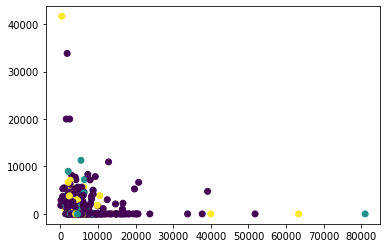

In [64]:
import matplotlib.pyplot as plt
plt.scatter(X.ApplicantIncome,X.CoapplicantIncome,c=model.labels_)

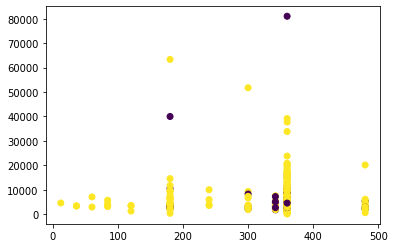

In [65]:
plt.scatter(X.Loan_Amount_Term,X.ApplicantIncome,c=q)

In [66]:
# 3.)If customer is not eligible for the input required amount and duration:

In [67]:
P1 = A[A.Loan_Status == "Y"]

In [68]:
P2 = B[B.predict == "Y"]

In [69]:
P2=P2.rename({"predict":"Loan_Status"},axis=1)

In [70]:
# P2.shape

In [71]:
trd=pd.concat([P1,P2])

In [72]:
trd

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009.0,1777.0,113.000000,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158.0,709.0,115.000000,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250.0,1993.0,126.000000,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000.0,2393.0,158.000000,360.0,1.0,Rural,Y


In [73]:
# trd.isna().sum()

In [74]:
filler(trd)

In [75]:
cat=[]
con=[]
for i in trd.columns:
    if trd[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [76]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [77]:
cat    

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [78]:
# Define X and Y

In [79]:
Y = trd[["LoanAmount"]]
X = trd.drop(labels=["LoanAmount","Loan_ID","Loan_Status"],axis=1)


In [80]:
cat=[]
con=[]
for i in X:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [82]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X1=pd.DataFrame(sd.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(trd[cat])
X2.index=range(0,730)
X=X1.join(X2)


In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [84]:
trd.corr()["LoanAmount"]


ApplicantIncome      0.575208
CoapplicantIncome    0.140559
LoanAmount           1.000000
Loan_Amount_Term     0.061990
Credit_History      -0.093168
Name: LoanAmount, dtype: float64

In [85]:
for i in X2:
    if X2[i].dtypes=="object":
        print("................")
        print("LoanAmount Vs",i)
        print(ANOVA(trd,i,"LoanAmount"))

In [86]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,pred_tr)
ts_err=mean_absolute_error(ytest,pred_ts)
print("Training Error:",tr_err,"\nTesting Error : ",ts_err)

Training Error: 35.95130220165343 
Testing Error :  38.8879098446861


In [87]:
Lon_Amnt_pred=B[B.predict=="N"]

In [88]:
Lon_Amnt_pred

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N
58,LP001323,Female,Yes,2,Graduate,No,2779,3664,176.0,360.0,0.0,Semiurban,N
63,LP001347,Female,No,0,Graduate,No,2101,1500,108.0,360.0,0.0,Rural,N
66,LP001352,Male,Yes,0,Not Graduate,No,4700,0,135.0,360.0,0.0,Semiurban,N
67,LP001358,Male,Yes,0,Graduate,No,3445,0,130.0,360.0,0.0,Semiurban,N
69,LP001361,Male,Yes,0,Graduate,No,2458,5105,188.0,360.0,0.0,Rural,N


In [89]:
# preparing Data for Making predicton

In [90]:
Lon_Amnt_pred=Lon_Amnt_pred.drop(["Loan_ID","predict","LoanAmount"],axis=1)

In [91]:
Lon_Amnt_pred.isna().sum()

Gender               2
Married              0
Dependents           0
Education            0
Self_Employed        9
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     1
Credit_History       0
Property_Area        0
dtype: int64

In [92]:
filler(Lon_Amnt_pred)
# Lon_Amnt_pred.isna().sum()

In [93]:
X.shape

(730, 19)

In [94]:
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(Lon_Amnt_pred[con]),columns=con)
X2 = pd.get_dummies(Lon_Amnt_pred[cat])
X2.index = range(0,59)
Xnew = X1.join(X2)

In [97]:
pred=(model.predict(Xnew))

In [98]:
pred

array([[142.17247228],
       [387.73730333],
       [151.52828195],
       [107.23277044],
       [ 90.58435906],
       [144.73593743],
       [ 83.84578004],
       [158.00862533],
       [135.14128577],
       [134.46556956],
       [148.91935481],
       [164.51768227],
       [140.57491238],
       [180.7879496 ],
       [116.42842729],
       [ 68.14807462],
       [ 94.62458247],
       [ 76.98076878],
       [ 85.72537301],
       [123.28102659],
       [362.25591283],
       [195.40524603],
       [149.74127893],
       [216.37658531],
       [257.65416464],
       [103.27287286],
       [102.03365445],
       [ 70.36618056],
       [ 53.28001719],
       [105.63376768],
       [ 91.09629276],
       [103.16822172],
       [155.73768088],
       [112.75210439],
       [172.99714758],
       [116.91181118],
       [180.07205677],
       [180.84127492],
       [168.31549661],
       [ 91.55574757],
       [110.96063639],
       [155.96085891],
       [117.75251395],
       [122

In [99]:
# if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? 
# What is that duration?(Regression)

In [100]:
time_duration=B[B.Loan_Amount_Term<=240]

In [101]:
time_duration

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,Y
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban,Y
19,LP001115,Male,No,0,Graduate,No,1300,3470,100.0,180.0,1.0,Semiurban,Y
21,LP001124,Female,No,3+,Not Graduate,No,2083,0,28.0,180.0,1.0,Urban,Y
29,LP001176,Male,No,0,Graduate,No,2942,2382,125.0,180.0,1.0,Urban,Y
36,LP001208,Male,Yes,2,Graduate,NaN,7350,4029,185.0,180.0,1.0,Urban,Y
53,LP001298,Male,Yes,2,Graduate,No,4116,1000,30.0,180.0,1.0,Urban,Y
57,LP001321,Male,Yes,2,Graduate,No,3613,3539,134.0,180.0,1.0,Semiurban,Y
59,LP001324,Male,Yes,3+,Graduate,No,4720,0,90.0,180.0,1.0,Semiurban,Y
72,LP001375,Male,Yes,1,Graduate,NaN,4083,1775,139.0,60.0,1.0,Urban,Y


In [102]:
time_duration.shape

(34, 13)

In [103]:
time_duration.index=range(0,34)

In [104]:
time_duration.isna().sum()

Loan_ID              0
Gender               1
Married              0
Dependents           1
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       2
Property_Area        0
predict              0
dtype: int64

In [105]:
filler(time_duration)

In [106]:
Y=time_duration[["Loan_Amount_Term"]]
X=time_duration.drop(["Loan_Amount_Term","Loan_ID","predict"],axis=1)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cat=[]
con=[]
for i in X:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X1=pd.get_dummies(X[cat])
X=X2.join(X1)

In [153]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=20)

In [154]:
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
trA_err=mean_absolute_error(ytrain,pred_tr)
tsA_err=mean_absolute_error(ytest,pred_ts)
print("Training Error:",trA_err,"\nTesting Error : ",tsA_err)

Training Error: 46.733804979079274 
Testing Error :  66.01669712522644


In [156]:
lm.predict(X)

array([[153.82322829],
       [227.8707538 ],
       [151.75378086],
       [180.91173497],
       [136.86110875],
       [176.62598778],
       [139.08234668],
       [141.47403041],
       [200.13663827],
       [143.69840463],
       [ 92.76983457],
       [250.00293244],
       [ 63.49062845],
       [118.26921098],
       [126.57343095],
       [222.20988661],
       [110.99147438],
       [192.39972117],
       [126.93996537],
       [127.56115828],
       [ 94.6914262 ],
       [118.0680874 ],
       [124.43232854],
       [132.16825624],
       [157.25884466],
       [127.70499624],
       [158.26826209],
       [176.34490132],
       [153.24589539],
       [160.34071592],
       [151.91943931],
       [151.57748456],
       [148.81935427],
       [188.74837039]])